In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import KNNImputer
import numpy as np
import tensorflow as tf
%matplotlib inline

In [2]:
# Read the CSV file
file_path = Path(".\df_scorecard.csv")
df = pd.read_csv(file_path)

# Review the DataFrame
df.head(5)

C:\Users\miesb\AppData\Local\Temp\ipykernel_12736\2573586110.py:3: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,UNITID,INSTNM,PREDDEG,HIGHDEG,CONTROL,CCSIZSET,ADM_RATE,SAT_AVG,UGDS,UG,...,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,loan_ever,pell_ever,md_earn_wne_p10
0,100636,COMMUNITY COLLEGE OF THE AIR FORCE,Predominantly associate's-degree granting,Associate degree,Public,not categorized,0.0,0.0,44141,0.0,...,Not catgorized,Not catgorized,Not catgorized,Not catgorized,Not catgorized,5859.65704,3922.457882,0,0,32900.0
1,100654,ALABAMA A & M UNIVERSITY,Predominantly bachelor's-degree granting,Graduate degree,Public,not categorized,0.0,0.0,3852,0.0,...,Not catgorized,Not catgorized,Not catgorized,Not catgorized,Not catgorized,5859.65704,3922.457882,0,0,32900.0
2,100663,UNIVERSITY OF ALABAMA AT BIRMINGHAM,Predominantly bachelor's-degree granting,Graduate degree,Public,not categorized,0.0,0.0,9889,0.0,...,Not catgorized,Not catgorized,Not catgorized,Not catgorized,Not catgorized,5859.65704,3922.457882,0,0,32900.0
3,100690,SOUTHERN CHRISTIAN UNIVERSITY,Predominantly bachelor's-degree granting,Graduate degree,Private nonprofit,not categorized,0.0,0.0,60,0.0,...,Not catgorized,Not catgorized,Not catgorized,Not catgorized,Not catgorized,5859.65704,3922.457882,0,0,32900.0
4,100706,UNIVERSITY OF ALABAMA IN HUNTSVILLE,Predominantly bachelor's-degree granting,Graduate degree,Public,not categorized,0.0,0.0,3854,0.0,...,Not catgorized,Not catgorized,Not catgorized,Not catgorized,Not catgorized,5859.65704,3922.457882,0,0,32900.0


In [3]:
#drop non benefical columns
drop_columns = ['UNITID', 'PREDDEG', 'UGDS', 'CURROPER', 'UG25abv']
df.drop(drop_columns, axis=1, inplace=True)

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the numerical columns
df_transform = StandardScaler().fit_transform(df[
        ["ADM_RATE", "SAT_AVG", "COSTT4_A", "TUITIONFEE_IN", "TUITIONFEE_OUT", "PCTFLOAN", 
            "GRAD_DEBT_MDN", "WDRAW_DEBT_MDN", "md_earn_wne_p10"]])

#Create new dataframe with scaled data
df_scaled = pd.DataFrame(df_transform, columns=["ADM_RATE", "SAT_AVG", "COSTT4_A", "TUITIONFEE_IN", "TUITIONFEE_OUT", "PCTFLOAN", 
            "GRAD_DEBT_MDN", "WDRAW_DEBT_MDN", "md_earn_wne_p10"])
                         
#display new scaled dataframe                         
df_scaled[0:3]

,ADM_RATE,SAT_AVG,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,PCTFLOAN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,md_earn_wne_p10
0,-0.610976,-0.46338,-0.0741,-0.201762,-0.158708,0.113563,-0.721353,-0.612103,-0.052845
1,-0.610976,-0.46338,-0.0741,-0.201762,-0.158708,0.113563,-0.721353,-0.612103,-0.052845
2,-0.610976,-0.46338,-0.0741,-0.201762,-0.158708,0.113563,-0.721353,-0.612103,-0.052845


In [5]:
# Convert categorical data to numeric with pd.get.dummies
df_dummies = pd.get_dummies(df, columns=['INSTNM', 'HIGHDEG', 'CONTROL', 'CCSIZSET', 'OVERALL_YR2_N', 'OVERALL_YR3_N', 'OVERALL_YR4_N', 'OVERALL_YR6_N', 
                              'OVERALL_YR8_N', 'loan_ever', 'pell_ever'])
df_dummies.head(5)


,ADM_RATE,SAT_AVG,UG,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,PCTFLOAN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,md_earn_wne_p10,...,pell_ever_0.93000000715255,pell_ever_0.93999999761581,pell_ever_0.94999998807907,pell_ever_0.95999997854232,pell_ever_0.97000002861022,pell_ever_0.98000001907348,pell_ever_0.99000000953674,pell_ever_1,pell_ever_1.0,pell_ever_not categorized
0,0.0,0.0,0.0,20940.0,8000.0,10990.0,0.5765,5859.65704,3922.457882,32900.0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.0,0.0,20940.0,8000.0,10990.0,0.5765,5859.65704,3922.457882,32900.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,0.0,20940.0,8000.0,10990.0,0.5765,5859.65704,3922.457882,32900.0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,0.0,20940.0,8000.0,10990.0,0.5765,5859.65704,3922.457882,32900.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,0.0,20940.0,8000.0,10990.0,0.5765,5859.65704,3922.457882,32900.0,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df_merged = pd.concat([df_scaled, df_dummies], axis=1)
df_merged.head(5)

,ADM_RATE,SAT_AVG,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,PCTFLOAN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,md_earn_wne_p10,ADM_RATE,...,pell_ever_0.93000000715255,pell_ever_0.93999999761581,pell_ever_0.94999998807907,pell_ever_0.95999997854232,pell_ever_0.97000002861022,pell_ever_0.98000001907348,pell_ever_0.99000000953674,pell_ever_1,pell_ever_1.0,pell_ever_not categorized
0,-0.610976,-0.46338,-0.0741,-0.201762,-0.158708,0.113563,-0.721353,-0.612103,-0.052845,0.0,...,False,False,False,False,False,False,False,False,False,False
1,-0.610976,-0.46338,-0.0741,-0.201762,-0.158708,0.113563,-0.721353,-0.612103,-0.052845,0.0,...,False,False,False,False,False,False,False,False,False,False
2,-0.610976,-0.46338,-0.0741,-0.201762,-0.158708,0.113563,-0.721353,-0.612103,-0.052845,0.0,...,False,False,False,False,False,False,False,False,False,False
3,-0.610976,-0.46338,-0.0741,-0.201762,-0.158708,0.113563,-0.721353,-0.612103,-0.052845,0.0,...,False,False,False,False,False,False,False,False,False,False
4,-0.610976,-0.46338,-0.0741,-0.201762,-0.158708,0.113563,-0.721353,-0.612103,-0.052845,0.0,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df_merged['md_earn_wne_p10'].dtypes

md_earn_wne_p10    float64
md_earn_wne_p10    float64
dtype: object

In [13]:
#Split data for training
X = df_merged.drop(columns=['md_earn_wne_p10'])
y = df_merged['md_earn_wne_p10']

In [14]:
#Split into training and testing datasets
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
# Apply PCA to the scaled numerical columns
# pca = PCA(n_components=19)  # Choose the number of principal components to retain
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

In [21]:
from sklearn.decomposition import PCA

# Create IncrementalPCA object
n_components = 19
sample_size = 1000  # Adjust batch size as needed

# Randomly sample the data
sampled_indices = np.random.choice(len(X_train), size=sample_size, replace=False)
X_train_sampled = X_train.iloc[sampled_indices]
y_train_sampled = y_train.iloc[sampled_indices]

# Apply PCA to the sampled data
pca = PCA(n_components=19)  # Choose the number of components
X_train_sampled_pca = pca.fit_transform(X_train_sampled)

# # Fit and transform on training data
# X_train_pca = pca.fit_transform(X_train)

# Transform test data
X_test_pca = pca.transform(X_test)

In [22]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[7.07807518e-01 1.78383536e-01 6.86576551e-02 2.53495366e-02
 1.34351186e-02 5.83095936e-03 5.35628406e-04 5.54135197e-09
 4.53197602e-09 3.12344632e-09 2.96468226e-09 1.75648743e-09
 1.47458680e-09 1.09852462e-09 8.86283197e-10 7.79258939e-10
 5.25087357e-10 4.34523489e-10 3.06799371e-10]


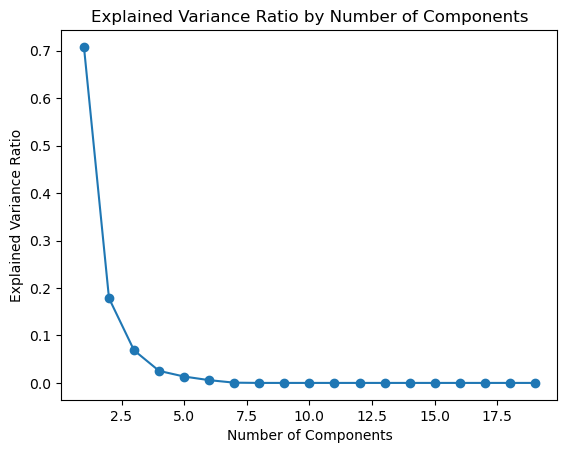

In [23]:
# Plot the explained variance ratio
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()

In [24]:
#set up model Random Forest. Instantiate with hyperparameters
rf_regressor_pca = RandomForestRegressor()


In [25]:
#Fit the model on the sample data
rf_regressor_pca.fit(X_train_sampled_pca, y_train_sampled)

RandomForestRegressor()

In [26]:
#Predictions on sample data
y_pred_pca = rf_regressor_pca.predict(X_test_pca)

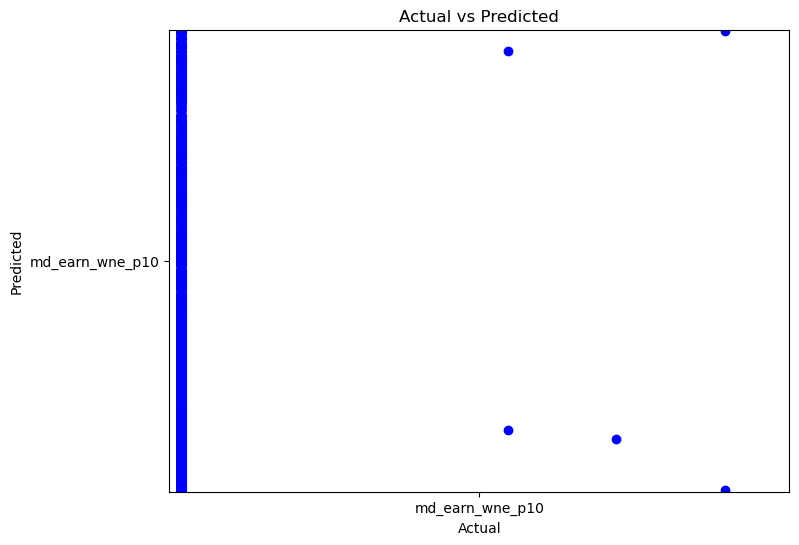

In [27]:
# Create scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_pca, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [29]:
#Evaluate the model -- not a good model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions on the test set
y_pred = rf_regressor_pca.predict(X_test_pca)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#Mean Absolute Error average absolute difference between the predicted values and actual values ~ predicted is off by 1009 from actual
print("Mean Absolute Error:", mae)

# Mean squared error average of the squares of the differeneces between the predicted values and the actual values ~ 
print("Mean Squared Error:", mse)

#Root mean squared error a measuer of how spread out the errors are
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 1009.4865121579182
Mean Squared Error: 14258021.64483726
Root Mean Squared Error: 3775.979560966566
